# SYDE 556/750 --- Assignment 1


In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize # For question 2.1b)

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$


First, we can simplify each equation by applying the inverse of G, starting with:

$$
0 = G[\alpha \xi + J_{\text{bias}}]
$$

$$
G^{-1}[0] = \alpha \xi + J_{\text{bias}}
$$

$$
J_{\text{th}} = \alpha \xi + J_{\text{bias}} \tag{a}
$$

Doing the same for the other equation, we get:

$$
a_{\text{max}} = G[\alpha + J_{\text{bias}}]
$$

$$
G^{-1}[a_{\text{max}}] = \alpha + J_{\text{bias}} \tag{b}
$$

Now, solve the system (a) and (b) using substitution. Start by rearranging for $J_{\text{bias}}$ and setting both expressions equal to each other:

$$
J_{\text{th}} - \alpha \xi = G^{-1}[a_{\text{max}}] - \alpha
$$

$$
\alpha (1 - \xi) = G^{-1}[a_{\text{max}}] - J_{\text{th}}
$$

$$
\alpha = \frac{G^{-1}[a_{\text{max}}] - J_{\text{th}}}{1 - \xi} \tag{1}
$$

Now, we have equation (1) for gain, which we can substitute back into (b) to solve for $J_{\text{bias}}$:

$$
G^{-1}[a_{\text{max}}] = \alpha = \frac{G^{-1}[a_{\text{max}}] - J_{\text{th}}}{1 - \xi} + J_{\text{bias}}
$$

$$
-\xi G^{-1}[a_{\text{max}}] + J_{\text{th}} = (1 - \xi) J_{\text{bias}}
$$

$$
J_{\text{bias}} = -\frac{ \xi G^{-1}[a_{\text{max}}] - J_{\text{th}}}{1 - \xi} \tag{2}
$$


Now, simplify these equations for the specific case $G[J] = \max(J, 0)$.


$G[J]$ is defined as the ReLU function. The output is $J$ when $J > 0$, and $0$ when $J \leq 0$.

This means that the threshold current, $J_{\text{th}}$, which we roughly defined as $G^{-1}[0]$, is 0. In other words, the current, $J$, in the exact moment before the neuron fires, or rather the exact point before the ReLU value becomes non-zero, is 0.

Also, when we achieve the value of $a_{\text{max}}$, we know that $J > 0$ because the neuron must be firing. Since $G[J]=J$ when $J > 0$, we know that the inverse of $G$, $G^{-1}$, will just be the value itself. Therefore, $G^{-1}[a_{\text{max}}] = a_{\text{max}}$.

Substituting these ReLU-specific conditions into equations (1) and (2), we can simplify to:

$$
\alpha = \frac{a_{\text{max}}}{1 - \xi}
$$

$$
J_{\text{bias}} = - \frac{\xi a_{\text{max}}}{1 - \xi}
$$


**b) Neuron tuning curves.** Plot the neuron tuning curves $a_i(x)$ for 16 randomly generated neurons following the intercept and maximum rate distributions described above.


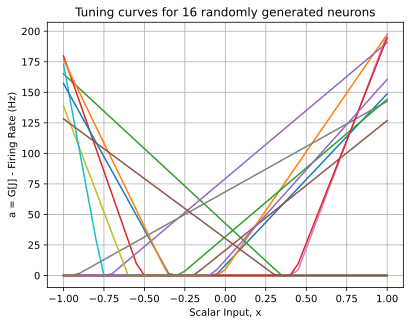

In [2]:
def G(J):
  return np.maximum(J, 0)

def generate_population_responses(n, x, a_max, xi, e):
  # Alpha & J_bias for each neuron
  alpha = a_max / (1 - xi)
  J_bias = ( -1 * xi * a_max ) / (1 - xi)

  A = np.zeros((n, len(x)))

  for i in range(n):
    # Encoding equation
    J = alpha[i] * np.dot(e[i], x) + J_bias[i]
    A[i, :] = G(J)
  
  return A

# Number of neurons, and samples for each
n = 16
N = 41

# x-values for each response curve, ranging from -1 to 1, incremented by 0.05
x = np.linspace(-1, 1, N)

# Max firing rates, x-intercepts, encoders, for each neuron
a_max = np.random.uniform(100, 200, n)
xi = np.random.uniform(-0.95, 0.95, n)
e = np.random.choice([-1,1], n)

A = generate_population_responses(n, x, a_max, xi, e)

# Plot response curves
plt.figure()
for i in range(n):
  plt.plot(x, A[i])

plt.ylabel("a = G[J] - Firing Rate (Hz)")
plt.xlabel("Scalar Input, x")
plt.title("Tuning curves for 16 randomly generated neurons")
plt.grid(True)
plt.show()

**c) Computing identity decoders.** Compute the optimal identity decoder $\vec d$ for those 16 neurons (as shown in class). Report the value of the individual decoder coefficients. Compute $d$ using the matrix notation mentioned in the course notes. Do not apply any regularization. $A$ is the matrix of activities (the same data used to generate the plot in 1.1b).


In [3]:
X = x.reshape(1, -1)
D = np.linalg.lstsq(A @ A.T, A @ X.T, rcond=None)[0].T

print("Individual decoder values:\n")
print(D)

Individual decoder values:

[[-6.84396064e-04  2.23289548e-04 -4.70247749e-03 -3.01048658e-04
  -5.25274610e-04 -1.83602751e-03 -2.90982032e-03 -8.75973780e-04
   1.77910608e-04  9.05561544e-05 -2.23923278e-02  1.70203040e-02
   8.34612736e-03  4.04760113e-03  6.11897011e-04  2.34378302e-03]]


**d) Evaluating decoding errors.** Compute and plot $\hat{x}=\sum_i d_i a_i(x)$. Overlay on the plot the line $y=x$. Make a separate plot of $x-\hat{x}$ to see what the error looks like. Report the Root Mean Squared Error (RMSE) value.


RMSE: 0.00260



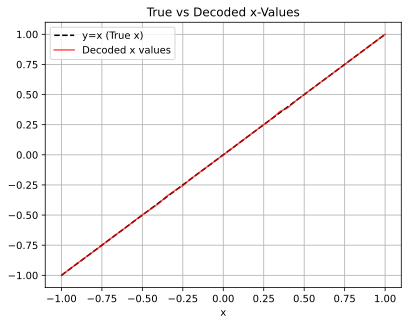

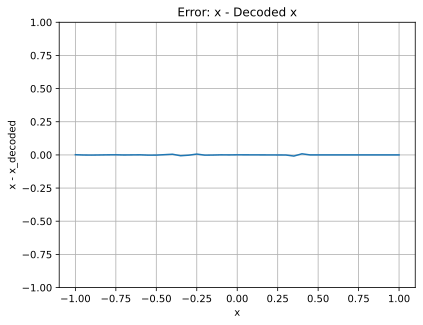

In [4]:
# Computing & plotting decoded values

x_decoded = (D @ A).T

RMSE = np.sqrt(np.mean((x - x_decoded.flatten()) ** 2))

print(f"RMSE: {RMSE:.5f}\n")

error = x - x_decoded.flatten()

# Plot decoded values for each x, over y=x line
plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black') 
plt.plot(x, x_decoded.flatten(), label="Decoded x values", color='red', alpha=0.7)
plt.xlabel("x")
plt.title(f"True vs Decoded x-Values")
plt.legend()
plt.grid(True)
plt.show()

# Plot error
plt.figure()
plt.plot(x, error)
plt.xlabel("x")
plt.ylabel("x - x_decoded")
plt.title("Error: x - Decoded x")
plt.ylim([-1,1]) # Setting axis limits that make it easier to compare upcoming error plots
plt.grid(True)
plt.show()

**e) Decoding under noise.** Now try decoding under noise. Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean $\mu=0$ and standard deviation of $\sigma=0.2 \max(A)$ (where $\max(A)$ is the maximum firing rate of all the neurons). Resample this variable for every different $x$ value for every different neuron. Create all the same plots as in part d). Report the RMSE.


RMSE (noisy activity): 1.096



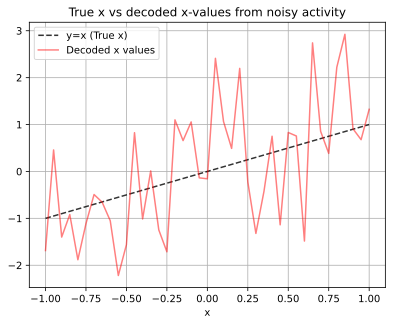

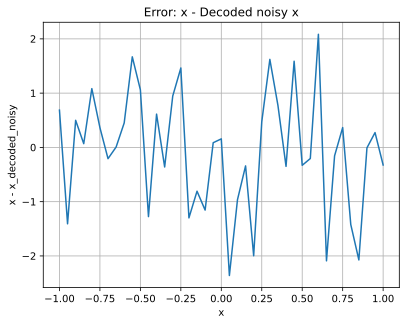

In [5]:
sigma = 0.2 * np.max(A)

noise = np.random.normal(0, sigma, A.shape)

A_noisy = A + noise

x_decoded_noisy = (D @ A_noisy).T

RMSE_noisy = np.sqrt(np.mean((x - x_decoded_noisy.flatten()) ** 2))

print(f"RMSE (noisy activity): {RMSE_noisy:.3f}\n")

error_noisy = x - x_decoded_noisy.flatten()

# Plot decoded values for each x, over y=x line
plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black', alpha=0.8) 
plt.plot(x, x_decoded_noisy.flatten(), label="Decoded x values", color='red', alpha=0.5)
plt.xlabel("x")
plt.title(f"True x vs decoded x-values from noisy activity")
plt.legend()
plt.grid(True)
plt.show()

# Plot error
plt.figure()
plt.plot(x, error_noisy)
plt.xlabel("x")
plt.ylabel("x - x_decoded_noisy")
plt.title("Error: x - Decoded noisy x")
plt.grid(True)
plt.show()

**f) Accounting for decoder noise.** Recompute the decoder $\vec d$ taking noise into account (i.e., apply the appropriate regularization, as shown in class). Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in d) and e). Report the RMSE for all cases.


RMSE (regularized decoders, normal activity): 0.055



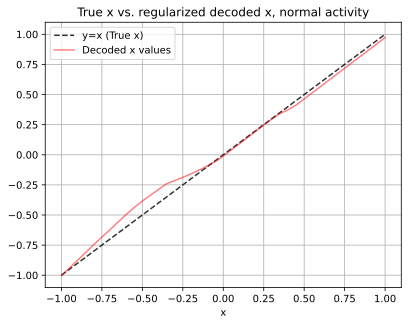

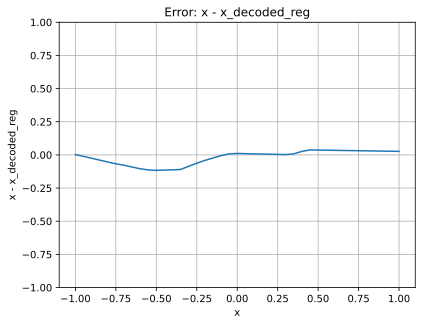

In [6]:
# Following equation (7) for computing regularized decoders
D_reg = np.linalg.lstsq(A @ A.T + N * np.square(sigma) * np.eye(n), A @ X.T, rcond=None)[0].T

# Decoding without noise added to A

x_decoded_reg = (D_reg @ A).T
RMSE_reg = np.sqrt(np.mean((x - x_decoded_reg.flatten()) ** 2))

print(f"RMSE (regularized decoders, normal activity): {RMSE_reg:.3f}\n")

error_reg = x - x_decoded_reg.flatten()

plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black', alpha=0.8) 
plt.plot(x, x_decoded_reg.flatten(), label="Decoded x values", color='red', alpha=0.5)
plt.xlabel("x")
plt.title(f"True x vs. regularized decoded x, normal activity")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(x, error_reg)
plt.xlabel("x")
plt.ylabel("x - x_decoded_reg")
plt.title("Error: x - x_decoded_reg")
plt.grid(True)
plt.ylim([-1,1])
plt.show()

RMSE (regularized decoders, noisy activity): 0.148



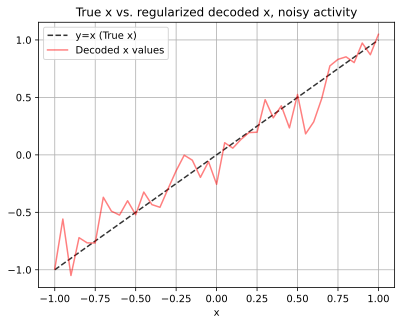

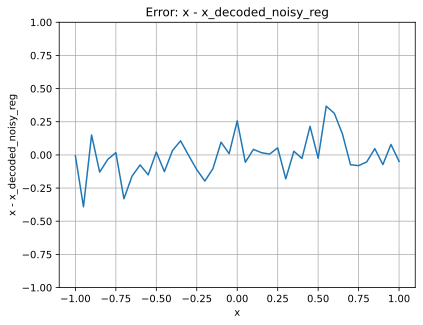

In [7]:
# Decoding with noise added to A

x_decoded_noisy_reg = (D_reg @ A_noisy).T
RMSE_noisy_reg = np.sqrt(np.mean((x - x_decoded_noisy_reg.flatten()) ** 2))

error_noisy_reg = x - x_decoded_noisy_reg.flatten()

print(f"RMSE (regularized decoders, noisy activity): {RMSE_noisy_reg:.3f}\n")

plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black', alpha=0.8) 
plt.plot(x, x_decoded_noisy_reg.flatten(), label="Decoded x values", color='red', alpha=0.5)
plt.xlabel("x")
plt.title(f"True x vs. regularized decoded x, noisy activity")
plt.legend()
plt.grid(True)
plt.show()

# Plot error
plt.figure()
plt.plot(x, error_noisy_reg)
plt.xlabel("x")
plt.ylabel("x - x_decoded_noisy_reg")
plt.title("Error: x - x_decoded_noisy_reg")
plt.grid(True)
plt.ylim([-1,1])
plt.show()

**g) Interpretation.** Show a 2x2 table of the four RMSE values reported in parts d), e), and f). This should show the effects of adding noise and whether the decoders $d$ are computed taking noise into account. Write a few sentences commenting on what the table shows, i.e., what the effect of adding noise to the activities is with respect to the measured error and why accounting for noise when computing the decoders increases/decreases/does not change the measured RMSE.


| **Decoders**      | **Non-Noisy Activity** | **Noisy Activity** |
| ----------------- | ---------------------- | ------------------ |
| **Unregularized** | 0.00260                | 1.096              |
| **Regularized**   | 0.055                  | 0.148              |

When we add noise directly to the activity response, the RMSE increases. This is especially the case for the unregularized decoders. When the response matrix A is noisy, the least-squares solution overfits the values of the decoders to the noise. So, when we try to use the decoders to get our original x-values back, we see wild variation.

Regularization constrains the decoders from overfitting to the exact values of A, making them more robust on noisy data. We can see that for regularized decoders, the jump in RMSE from regular to noisy data is much less severe.

The unregularized decoders on non-noisy data produce the least RMSE, since they are fitted very closely to the values in A, without there being any randomness introduced by noise that might steer the calculations off. The error comes from approximation using least-squares optimization alone.


## 1.2 Exploring sources of error

**a) Exploring error due to distortion and noise.** Plot the error due to distortion $E_\mathrm{dist}$ and the error due to noise $E_\mathrm{noise}$ as a function of $n$, the number of neurons. Generate two different loglog plots (one for each type of error) with $n$ values of at least $[4, 8, 16, 32, 64, 128, 256, 512]$. For each $n$ value, do at least $5$ runs and average the results. For each run, different $\alpha$, $J^\mathrm{bias}$, and $e$ values should be generated for each neuron. Compute $d$ taking noise into account, with $\sigma = 0.1 \max(A)$. Show visually that the errors are proportional to $1/n$ or $1/n^2$.


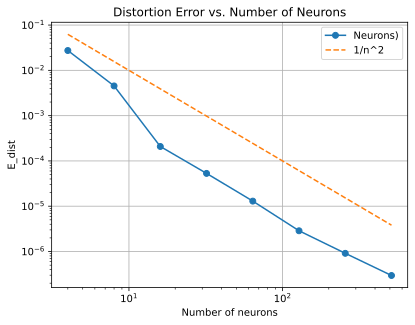

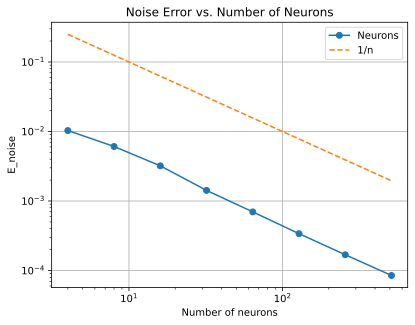

In [8]:
n_values = np.array([4, 8, 16, 32, 64, 128, 256, 512])

E_dist_values = np.zeros(len(n_values))
E_noise_values = np.zeros(len(n_values))

# Breakdown of E = E_dist + E_noise, from equation (8) in notes:

def E_dist(n, x, D, A):
    x_decoded = (D @ A).T
    
    e_dist = 0.5 * np.mean((x - x_decoded.flatten()) ** 2)
    return e_dist

def E_noise(n, D, sigma):
    e_noise = 0.5 * np.square(sigma) * np.sum(D ** 2)
    return e_noise

# Now, compute errors based on population of n neurons:
# Note: N (samples) and x-values same as before

def compute_error(n, sigma_coeff):
  acc_e_dist = 0
  acc_e_noise = 0

  for _ in range(5):
    # Generate max firing rates, x-intercepts, encoders, for each neuron
    a_max = np.random.uniform(100, 200, n)
    xi = np.random.uniform(-0.95, 0.95, n)
    e = np.random.choice([-1,1], n)

    # For each run, generate responses for neuron population
    A = generate_population_responses(n, x, a_max, xi, e)

    sigma = sigma_coeff * np.max(A)

    # Compute regularized decoders
    D = np.linalg.lstsq(A @ A.T + N * np.square(sigma) * np.eye(n), A @ X.T, rcond=None)[0].T

    acc_e_dist += E_dist(n, x, D, A)
    acc_e_noise += E_noise(n, D, sigma)

  # Return average errors from 5 runs
  return acc_e_dist / 5, acc_e_noise / 5


# Get E_dist and E_noise values, as a function of number of neurons:
for i in range(len(n_values)):
  e_dist, e_noise = compute_error(n_values[i], 0.1)

  E_dist_values[i] = e_dist
  E_noise_values[i] = e_noise

# E_dist with 1/n^2 overlay
plt.figure()
plt.loglog(n_values, E_dist_values, label="Neurons)", marker='o')
plt.loglog(n_values, 1/n_values**2, label="1/n^2", linestyle='--')
plt.xlabel("Number of neurons")
plt.ylabel("E_dist")
plt.title("Distortion Error vs. Number of Neurons")
plt.grid(True)
plt.legend()
plt.show()

# E_noise with 1/n overlay
plt.figure()
plt.loglog(n_values, E_noise_values, label="Neurons", marker='o')
plt.loglog(n_values, 1/n_values, label="1/n", linestyle='--')
plt.xlabel("Number of neurons")
plt.ylabel("E_noise")
plt.title("Noise Error vs. Number of Neurons")
plt.grid(True)
plt.legend()
plt.show()

We can note that E_dist decreases proportionally to 1/n^2, and E_noise decreases proportionally to 1/n, as shown visually in the plots.


**b) Adapting the noise level.** Repeat part a) with $\sigma = 0.01 \max(A)$.


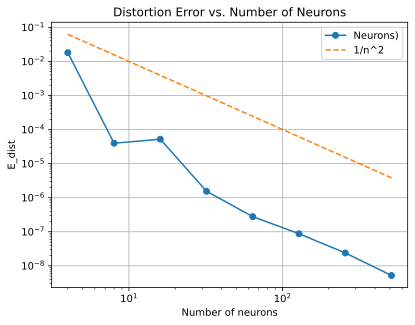

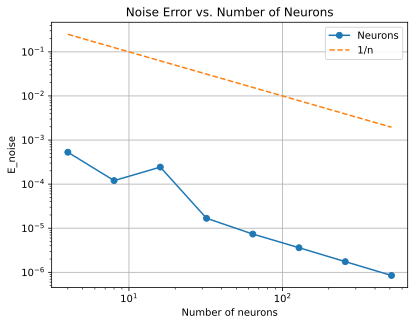

In [9]:
E_dist_values = np.zeros(len(n_values))
E_noise_values = np.zeros(len(n_values))

# Repeated with 0.01 as coefficient
# Get E_dist and E_noise values, as a function of n values:
for i in range(len(n_values)):
  e_dist, e_noise = compute_error(n_values[i], 0.01)

  E_dist_values[i] = e_dist
  E_noise_values[i] = e_noise

# E_dist with 1/n^2 overlay
plt.figure()
plt.loglog(n_values, E_dist_values, label="Neurons)", marker='o')
plt.loglog(n_values, 1/(n_values**2), label="1/n^2", linestyle='--')
plt.xlabel("Number of neurons")
plt.ylabel("E_dist")
plt.title("Distortion Error vs. Number of Neurons")
plt.grid(True)
plt.legend()
plt.show()

# E_noise with 1/n overlay
plt.figure()
plt.loglog(n_values, E_noise_values, label="Neurons", marker='o')
plt.loglog(n_values, 1/n_values, label="1/n", linestyle='--')
plt.xlabel("Number of neurons")
plt.ylabel("E_noise")
plt.title("Noise Error vs. Number of Neurons")
plt.grid(True)
plt.legend()
plt.show()

**c) Interpretation.** What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?


Between a) and b), the error from noise, E_noise, is smaller overall by a couple of orders of magnitude. This is because the noise due to error is direcly related to σ, the variability of the noise, which we manually adjusted between the examples.

For both of the noise plots, E_noise decreases the more neurons we have. When we're assuming noise is independent across neurons, the random noise fluctuations tend to cancel each other out and average out the more we increase the population. In other words, the effect of noise becomes smaller compared to the true signal, the more neurons we have.

Specifically, the decrease is proportional to 1/n since the averaging of noise across neurons scales linearly with the number of neurons.

Between a) and b), the distortion error, E_dist, stays generally on the same order of magnitude. This demonstrates that distortion error is purely due to the limited ability of some number of neurons to represent the population's response for the entire input space. In other words, distortion error depends entirely on how well our neuron population is represented, and is completely independent of noise.

We see a more rapid decrease in distortion error as the number of neurons increases, since larger populations can more accurately represent the input space. The decrease being proportional to 1/n^2 shows that adding additional neurons contributes to a quadratic reduction in error.


## 1.3 Leaky Integrate-and-Fire neurons

**a) Computing gain and bias.** As in the second part of 1.1a), given a maximum firing rate $a^\mathrm{max}$ and a bias $J^\mathrm{bias}$, write down the equations for computing $\alpha$ and the $J^\mathrm{bias}$ for this specific neuron model.


We already solved the appropriate system of equations to come up with expressions for gain and bias. Recall:

$$
\alpha = \frac{G^{-1}[a_{\text{max}}] - J_{\text{th}}}{1 - \xi} \tag{1}
$$

$$
J_{\text{bias}} = -\frac{ \xi G^{-1}[a_{\text{max}}] - J_{\text{th}}}{1 - \xi} \tag{2}
$$

Now, we can apply the properties of our new $G[J]$ to simplify these expressions.

First, let's look at the value of $G^{-1}[a_{\text{max}}]$. When we reach $a_{\text{max}}$, we know the neuron will be firing, therefore $J > 1$. We can solve for $J$ when $G[J] = a_{\text{max}}$, using the LIF equation:

$$
a_{\text{max}} = \frac{1}{\tau_{\text{ref}} - \tau_{\text{RC}} \ln\left(1 - \frac{1}{J}\right)}
$$

$$
\tau_{\text{ref}} - \tau_{\text{RC}} \ln\left(1 - \frac{1}{J}\right) = \frac{1}{a_{\text{max}}}
$$

$$
e^{\left(\frac{\tau_{\text{ref}} - \frac{1}{a_{\text{max}}}}{\tau_{\text{RC}}}\right)} = 1 - \frac{1}{J}
$$

$$
J = \frac{1}{1 - e^{\left(\frac{\tau_{\text{ref}} - \frac{1}{a_{\text{max}}}}{\tau_{\text{RC}}}\right)}} = G^{-1}[a_{\text{max}}]
$$

Next, we can simplify $J_{\text{th}}$, which as before, we roughly defined as $G^{-1}[0]$. From our LIF definition of $G$, the threshold value of J, at the exact point before the neuron starts firing, is 1. So $J_{\text{th}} = 1$

Substituting these values into (1) and simplifying through, we get:

$$
\alpha = \frac{e^{\left( \frac{\tau_{\text{ref}} - \frac{1}{a_{\text{max}}}}{\tau_{\text{RC}}} \right)}}{(1 - \xi) \left( 1 - e^{\left( \frac{\tau_{\text{ref}} - \frac{1}{a_{\text{max}}}}{\tau_{\text{RC}}} \right)} \right)}
$$

Then, looking at equation (a) from before,

$$
J_{\text{bias}} = J_{\text{th}} - \alpha \xi
$$

Substituting $J_{\text{th}} = 1$:

$$
J_{\text{bias}} = 1 - \alpha \xi
$$


**b) Neuron tuning curves.** Generate the same plot as in 1.1b). Use $\tau_\mathrm{ref}=2 \mathrm{ms}$ and $\tau_{RC}=20 \mathrm{ms}$. Use the same distribution of $x$-intercepts and maximum firing rates as in 1.1.


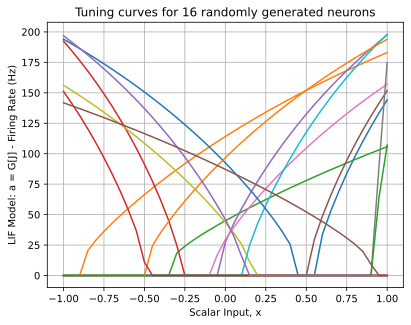

In [10]:
# Re-define G(J) for approximation LIF model
def G(J, t_ref, t_RC):
  return np.where(J <= 1, 0, 1 / (t_ref -( t_RC * np.log(np.clip(1 - 1 / J, 1e-10, None)))))

def generate_population_responses(n, x, a_max, xi, e, t_ref, t_RC):
  # Alpha & J_bias for each neuron, LIF model
  exp_term = 1 - np.exp( ( t_ref - (1 / a_max) ) / t_RC )
  alpha = (1 - exp_term) / ((exp_term) * (1 - xi)) # New alpha equation, same as above
  J_bias = 1 - alpha * xi 

  A = np.zeros((n, len(x)))

  for i in range(n):
    # Encoding equation
    J = alpha[i] * np.dot(e[i], x) + J_bias[i]
    A[i, :] = G(J, t_ref, t_RC)
  
  return A

# Number of neurons, and samples for each
n = 16
N = 41

# x-values for each response curve, ranging from -1 to 1, incremented by 0.05
x = np.linspace(-1, 1, N)

# Time constants
t_ref = 0.002
t_RC = 0.02

# Max firing rates, x-intercepts, encoders, for each neuron
a_max = np.random.uniform(100, 200, n)
xi = np.random.uniform(-0.95, 0.95, n)
e = np.random.choice([-1,1], n)

A = generate_population_responses(n, x, a_max, xi, e, t_ref, t_RC)

# Plot response curves
plt.figure()
for i in range(n):
  plt.plot(x, A[i])

plt.ylabel("LIF Model: a = G[J] - Firing Rate (Hz)")
plt.xlabel("Scalar Input, x")
plt.title("Tuning curves for 16 randomly generated neurons")
plt.grid(True)
plt.show()

**c) Impact of noise.** Generate the same four plots as in 1.1f) (adding/not adding noise to $A$, accounting/not accounting for noise when computing $\vec d$), and report the RMSE both with and without noise.


RMSE: 0.00718



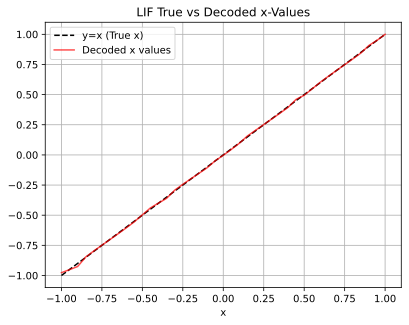

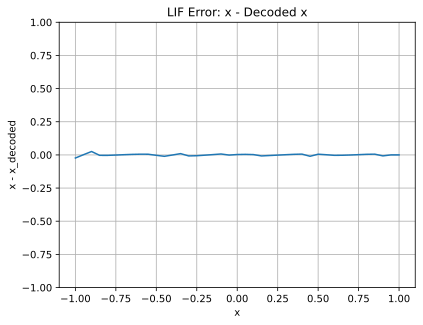

In [11]:
X = x.reshape(1, -1)

D = np.linalg.lstsq(A @ A.T, A @ X.T, rcond=None)[0].T

# Computing & plotting decoded values

x_decoded = (D @ A).T

RMSE = np.sqrt(np.mean((x - x_decoded.flatten()) ** 2))

print(f"RMSE: {RMSE:.5f}\n")

error = x - x_decoded.flatten()

# Plot decoded values for each x, over y=x line
plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black') 
plt.plot(x, x_decoded.flatten(), label="Decoded x values", color='red', alpha=0.7)
plt.xlabel("x")
plt.title(f"LIF True vs Decoded x-Values")
plt.legend()
plt.grid(True)
plt.show()

# Plot error
plt.figure()
plt.plot(x, error)
plt.xlabel("x")
plt.ylabel("x - x_decoded")
plt.title("LIF Error: x - Decoded x")
plt.ylim([-1,1])
plt.grid(True)
plt.show()

RMSE (noisy activity): 0.185



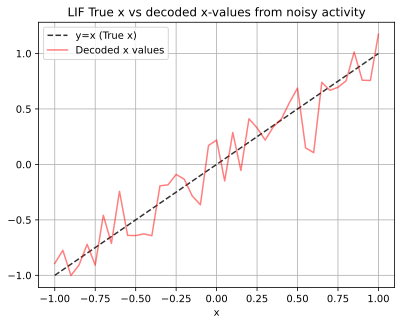

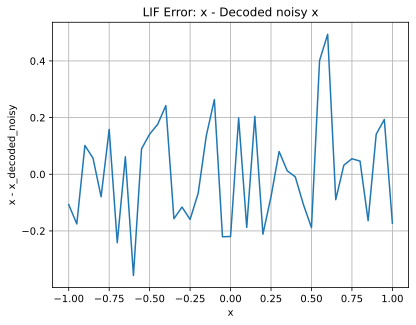

In [12]:
# Add same Gaussian noise as before
sigma = 0.2 * np.max(A)
noise = np.random.normal(0, sigma, A.shape)

A_noisy = A + noise

x_decoded_noisy = (D @ A_noisy).T

RMSE_noisy = np.sqrt(np.mean((x - x_decoded_noisy.flatten()) ** 2))

print(f"RMSE (noisy activity): {RMSE_noisy:.3f}\n")

error_noisy = x - x_decoded_noisy.flatten()

# Plot decoded values for each x, over y=x line
plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black', alpha=0.8) 
plt.plot(x, x_decoded_noisy.flatten(), label="Decoded x values", color='red', alpha=0.5)
plt.xlabel("x")
plt.title(f"LIF True x vs decoded x-values from noisy activity")
plt.legend()
plt.grid(True)
plt.show()

# Plot error
plt.figure()
plt.plot(x, error_noisy)
plt.xlabel("x")
plt.ylabel("x - x_decoded_noisy")
plt.title("LIF Error: x - Decoded noisy x")
plt.grid(True)
plt.show()

RMSE (regularized decoders, normal activity): 0.032



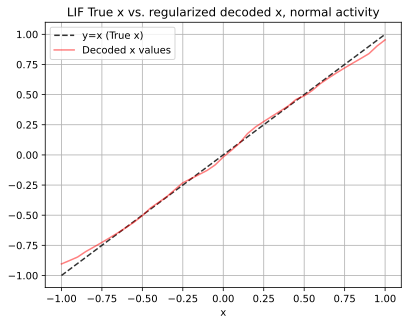

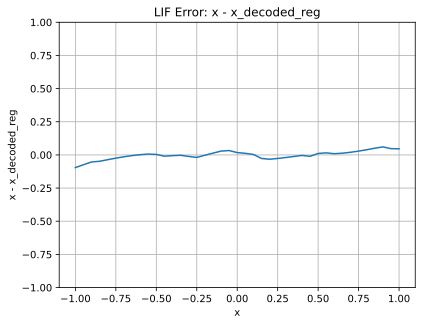

In [13]:
# Following equation (7) for computing regularized decoders
D_reg = np.linalg.lstsq(A @ A.T + N * np.square(sigma) * np.eye(n), A @ X.T, rcond=None)[0].T

# Decoding without noise added to A

x_decoded_reg = (D_reg @ A).T
RMSE_reg = np.sqrt(np.mean((x - x_decoded_reg.flatten()) ** 2))

print(f"RMSE (regularized decoders, normal activity): {RMSE_reg:.3f}\n")

error_reg = x - x_decoded_reg.flatten()

plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black', alpha=0.8) 
plt.plot(x, x_decoded_reg.flatten(), label="Decoded x values", color='red', alpha=0.5)
plt.xlabel("x")
plt.title(f"LIF True x vs. regularized decoded x, normal activity")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(x, error_reg)
plt.xlabel("x")
plt.ylabel("x - x_decoded_reg")
plt.title("LIF Error: x - x_decoded_reg")
plt.grid(True)
plt.ylim([-1,1])
plt.show()

RMSE (regularized decoders, noisy activity): 0.092



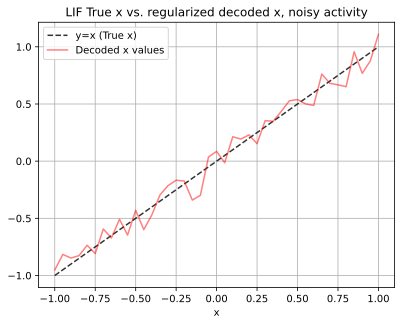

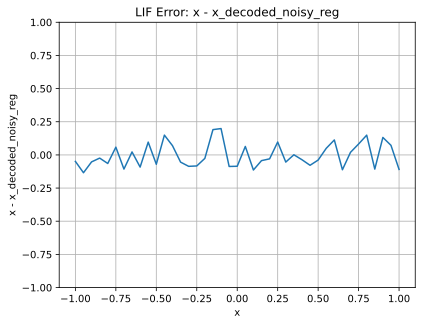

In [14]:
# Decoding with noise added to A

x_decoded_noisy_reg = (D_reg @ A_noisy).T
RMSE_noisy_reg = np.sqrt(np.mean((x - x_decoded_noisy_reg.flatten()) ** 2))

error_noisy_reg = x - x_decoded_noisy_reg.flatten()

print(f"RMSE (regularized decoders, noisy activity): {RMSE_noisy_reg:.3f}\n")

plt.figure()
plt.plot(x, x, label="y=x (True x)", linestyle='--', color='black', alpha=0.8) 
plt.plot(x, x_decoded_noisy_reg.flatten(), label="Decoded x values", color='red', alpha=0.5)
plt.xlabel("x")
plt.title(f"LIF True x vs. regularized decoded x, noisy activity")
plt.legend()
plt.grid(True)
plt.show()

# Plot error
plt.figure()
plt.plot(x, error_noisy_reg)
plt.xlabel("x")
plt.ylabel("x - x_decoded_noisy_reg")
plt.title("LIF Error: x - x_decoded_noisy_reg")
plt.grid(True)
plt.ylim([-1,1])
plt.show()

# 2. Reperesentation of Vectors

## 2.1 Vector tuning curves

**a) Plotting 2D tuning curves.** Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an $x$-intercept at the origin $(0,0)$, and has a maximum firing rate of $100 \mathrm{Hz}$.


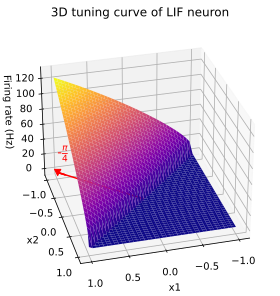

In [15]:
theta = -1 * np.pi / 4
e = np.array([np.cos(theta), np.sin(theta)])
a_max = 100
xi = 0

# Gain & bias for the one LIF neuron, based on defined parameters
exp_term = 1 - np.exp( ( t_ref - (1 / a_max) ) / t_RC )
alpha = (1 - exp_term) / ((exp_term) * (1 - xi))
J_bias = 1 - alpha * xi 

X1, X2 = np.meshgrid(x, x)

dot_products = e[0] * X1 + e[1] * X2

J = alpha * dot_products + J_bias
A = G(J, t_ref, t_RC)

# Plot 3D tuning curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=75)

ax.plot_surface(X1, X2, A, cmap='plasma')

# Mark -pi/4 on plot
ax.quiver(0, 0, 0, np.cos(theta)*1.4, np.sin(theta)*1.4, 0, color='red', arrow_length_ratio=0.1)
ax.scatter(np.cos(theta)*1.4, np.sin(theta)*1.4, 0, color='red', marker="v", s=40)
ax.text(np.cos(theta)*1.4, np.sin(theta)*1.4, 15, r'-$\frac{\pi}{4}$', color='red', fontsize=13, ha='left', va='bottom')

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Firing rate (Hz)")
ax.set_title("3D tuning curve of LIF neuron")

plt.show()

**b) Plotting the 2D tuning curve along the unit circle.** Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle, i.e., sample the activation for different angles $\theta$. Fit a curve of the form $c_1 \cos(c_2\theta+c_3)+c_4$ to the tuning curve and plot it as well.


c1, c2, c3, c4: [56.07672583  1.14141703 -5.41806262 40.44557285] 



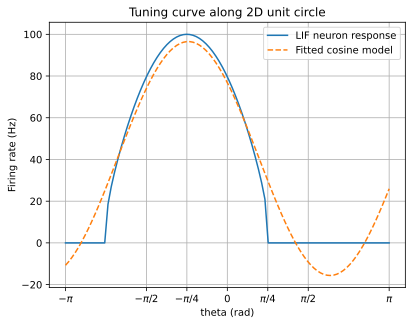

In [16]:
def cosine_curve(theta, c1, c2, c3, c4):
  return c1 * np.cos(c2 * theta + c3) + c4

# Theta angles around 2D unit circle
theta_vals = np.linspace(-np.pi, np.pi, 100)

# Unit circle points
x_circle = np.array([np.cos(theta_vals), np.sin(theta_vals)])

dot_products = e[0] * x_circle[0, :] + e[1] * x_circle[1, :]

J = alpha * dot_products + J_bias
A = G(J, t_ref, t_RC)

# Find the parameters that will fit the neuron response values to the given cosine curve
params, _ = scipy.optimize.curve_fit(cosine_curve, theta_vals, A)

print("c1, c2, c3, c4:", params, "\n")

# Create the curve using the parameters
A_fitted = cosine_curve(theta_vals, *params)

plt.figure()
plt.plot(theta_vals, A, label='LIF neuron response')
plt.plot(theta_vals, A_fitted, label='Fitted cosine model', linestyle='--')
plt.xlabel("theta (rad)")
plt.ylabel("Firing rate (Hz)")
plt.title("Tuning curve along 2D unit circle")

plt.xticks(
    ticks=[-np.pi, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, np.pi],
    labels=[r'$-\pi$', r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$', r'$\pi$']
)

plt.legend()
plt.grid(True)
plt.show()

**c) Discussion.** What makes a cosine a good choice for the curve fit in 2.1b? Why does it differ from the ideal curve?


Biologically, neuron population responses tend to be sinusoidal, since neurons have higher firing rates with stimulus that aligns with their preferred values/direction, and the firing rate gradually gets lower as the stimulus moves away from their preferred direction. In our example, the cosine function reflects the peak in the firing rate that we see at -pi/4, and the gradual lowering of the firing rate as we move away from that angle.

The cosine is also naturally aligned to be symmetric and smooth given circular input, which is what we've provided in this example.

The cosine function doesn't perfectly capture the ideal curve, since in reality, neurons have thresholds for firing. In an actual neural response, we won't see any firing until we reach a specific threshold current. We also have nonlinearities through membrane dynamics, the refractory period, etc. which cosine can't capture because it's a continuous function that assumes continuous, smooth output at all inputs.


## 2.2 Vector representation

**a) Choosing encoding vectors.** Generate a set of $100$ random unit vectors uniformly distributed around the unit circle. These will be the encoders $\vec e$ for $100$ neurons. Plot these vectors with a quiver or line plot (i.e., not just points, but lines/arrows to the points).


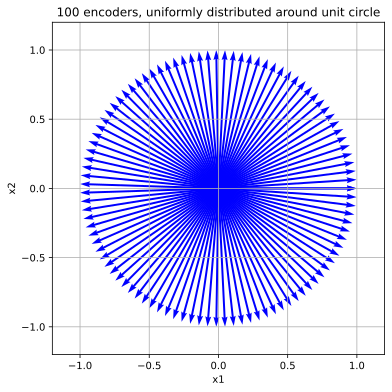

In [17]:
n = 100

# Obtain a uniform distribution of directions
theta_vals = np.linspace(0, 2*np.pi, n)

# x1 and x2 components of each vector
x1 = np.cos(theta_vals)
x2 = np.sin(theta_vals)

plt.figure(figsize=(6, 6))
plt.quiver(np.zeros(n), np.zeros(n), x1, x2, angles='xy', scale_units='xy', scale=1, color='blue')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.gca().set_aspect('equal')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("100 encoders, uniformly distributed around unit circle")
plt.grid(True)

plt.show()

**b) Computing the identity decoder.** Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with $\sigma = 0.2\max(A)$. Plot the decoders in the same way you plotted the encoders.


(2, 100)


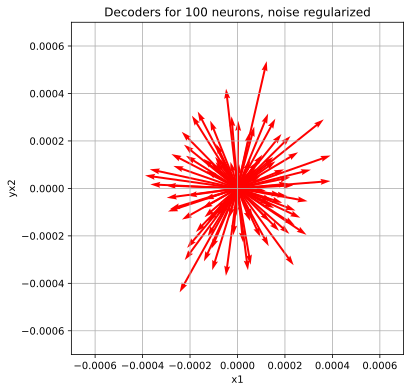

In [18]:
# Encoder vectors, now 2x100 matrix
encoders = np.vstack([x1, x2])

# Create matrix X, 2x1600

x1_vals = np.arange(-1,1 + 0.05, 0.05)
x2_vals = np.arange(-1, 1 + 0.05, 0.05)

X1, X2 = np.meshgrid(x1_vals, x2_vals)

X_grid = np.vstack([X1.flatten(), X2.flatten()])

X = X_grid[:, :1600]

# Re-defining properties from 1.3

t_ref = 0.002
t_RC = 0.02
a_max = np.random.uniform(100, 200, n)
xi = np.random.uniform(-0.95, 0.95, n)

alpha = 1 / ((1 - np.exp( ( t_ref - (1 / a_max) ) / t_RC )) * (1 - xi))
J_bias = - alpha * xi

# Calculate A

dot_products = np.dot(encoders.T, X)

J = alpha[:, np.newaxis] * dot_products + J_bias[:, np.newaxis]
    
A = G(J, t_ref, t_RC)

# Compute decoders, regularized for noise

sigma = 0.2 * np.max(A)

D = np.linalg.lstsq(A @ A.T + A.shape[1] * np.square(sigma) * np.eye(n), A @ X.T, rcond=None)[0].T

print(D.shape) # (2, 100)

# Plot in quiver plot

plt.figure(figsize=(6, 6))
plt.quiver(np.zeros(n), np.zeros(n), D[0,:], D[1,:], angles='xy', scale_units='xy', scale=1, color='red')
plt.xlim(-0.0007, 0.0007)
plt.ylim(-0.0007, 0.0007)
plt.gca().set_aspect('equal')

plt.xlabel("x1")
plt.ylabel("yx2")
plt.title("Decoders for 100 neurons, noise regularized")
plt.grid(True)

plt.show()

**c) Discussion.** How do these decoding vectors compare to the encoding vectors?


The magnitudes of the decoders are much smaller. This is because the activity values are quite large (up to the hundreds). The decoders are trying to bring us from these large values back to x-input vectors whose magnitudes are somewhere around 1 or less, while accounting for noise. The regularization term also penalizes large decoder values, the higher the regularization gets.

The encoders had uniform magnitudes, based on how we defined them. The decoders have different magnitudes and are clustered less uniformly than the encoders. This is because we randomly sampled the directions & magnitudes of the x-vector inputs, and the decoders are trying to bring us back to those inputs.


**d) Testing the decoder.** Generate 20 random $\vec x$ values throughout the unit circle (i.e.,~with different directions and radiuses). For each $\vec x$ value, determine the neural activity $a_i$ for each of the 100 neurons. Now decode these values (i.e. compute $\hat{x} = D \vec a$) using the decoders from part b). Plot the original and decoded values on the same graph in different colours, and compute the RMSE.


RMSE: 0.05286



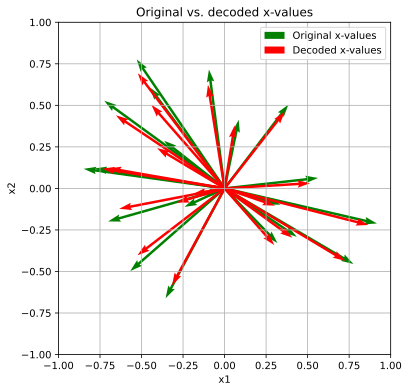

In [19]:
n = 20
theta_vals = np.random.uniform(0, 2*np.pi, n)
r_vals = np.random.uniform(0, 1, n)

# Matrix of random x samples
X_test = np.vstack([r_vals * np.cos(theta_vals), r_vals * np.sin(theta_vals)])

# Compute new A for test samples

dot_products = np.dot(encoders.T, X_test)

J = alpha[:, np.newaxis] * dot_products + J_bias[:, np.newaxis]

A_test = G(J, t_ref, t_RC)

# Decode X

X_decoded = D @ A_test

# RMSE & plot

RMSE = np.sqrt(np.mean((X_test.flatten() - X_decoded.flatten()) ** 2))
print(f"RMSE: {RMSE:.5f}\n")

plt.figure(figsize=(6,6))
plt.quiver(np.zeros(n), np.zeros(n), X_test[0, :], X_test[1, :], color='green', scale_units='xy', angles='xy', scale=1, label='Original x-values')

plt.quiver(np.zeros(n), np.zeros(n), X_decoded[0, :], X_decoded[1, :], color='red', scale_units='xy', angles='xy', scale=1, label='Decoded x-values')

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original vs. decoded x-values')
plt.legend()
plt.grid(True)
plt.show()

**e) Using encoders as decoders.** Repeat part d) but use the _encoders_ as decoders. This is what Georgopoulos used in his original approach to decoding information from populations of neurons. Plot the decoded values and compute the RMSE. In addition, recompute the RMSE in both cases, but ignore the magnitude of the decoded vectors by normalizing before computing the RMSE.


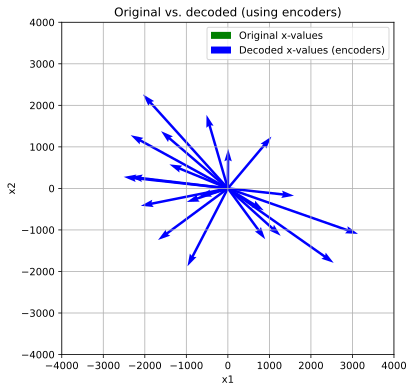

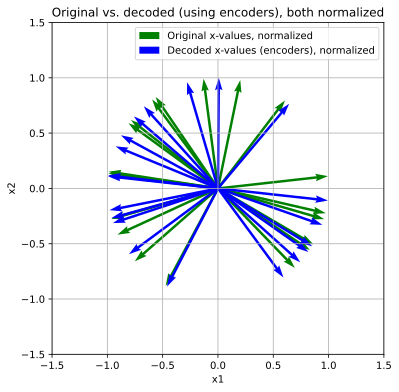

RMSE (normalized, decoders): 0.04568

RMSE (normalized, encoders): 0.10375



In [20]:
# Decode x-values from A values using encoders
X_decoded_encoders = encoders @ A_test 

# Normalize original x-values, decoded, and decoded with encoders
X_test_normalized = X_test / np.linalg.norm(X_test, axis=0)
X_decoded_normalized = X_decoded / np.linalg.norm(X_decoded, axis=0)
X_decoded_encoders_normalized = X_decoded_encoders / np.linalg.norm(X_decoded_encoders, axis=0)

# Plot decoded x from encoders
plt.figure(figsize=(6, 6))
plt.quiver(np.zeros(n), np.zeros(n), X_test[0, :], X_test[1, :], color='green', scale_units='xy', angles='xy', scale=1, label='Original x-values')
plt.quiver(np.zeros(n), np.zeros(n), X_decoded_encoders[0, :], X_decoded_encoders[1, :], color='blue', scale_units='xy', angles='xy', scale=1, label='Decoded x-values (encoders)')
plt.xlim([-4000, 4000])
plt.ylim([-4000, 4000])
plt.gca().set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original vs. decoded (using encoders)')
plt.legend()
plt.grid(True)
plt.show()

# Plot again, but both normalized
plt.figure(figsize=(6, 6))
plt.quiver(np.zeros(n), np.zeros(n), X_test_normalized[0, :], X_test_normalized[1, :], color='green', scale_units='xy', angles='xy', scale=1, label='Original x-values, normalized')
plt.quiver(np.zeros(n), np.zeros(n), X_decoded_encoders_normalized[0, :], X_decoded_encoders_normalized[1, :], color='blue', scale_units='xy', angles='xy', scale=1, label='Decoded x-values (encoders), normalized')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.gca().set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original vs. decoded (using encoders), both normalized')
plt.legend()
plt.grid(True)
plt.show()

# RMSE

RMSE_norm_decoders = np.sqrt(np.mean((X_test_normalized.flatten() - X_decoded_normalized.flatten()) ** 2))
RMSE_norm_encoders = np.sqrt(np.mean((X_test_normalized.flatten() - X_decoded_encoders_normalized.flatten()) ** 2))

print(f"RMSE (normalized, decoders): {RMSE_norm_decoders:.5f}\n")
print(f"RMSE (normalized, encoders): {RMSE_norm_encoders:.5f}\n")

When we plot the original and decoded x-values initially, it's hard to even see the original x-values because the difference in magnitude is so huge.

We can recall that the decoders we'd normally calculate would be very small values. They are decoding relatively large activity values, accounting for noise, back to x-values with length less than 1. So, using the encoders instead of the decoders gives us decoded x-values with larger magnitudes.

The second plot has all vectors normalized to unit length, so we can see where the normalized error (angular only) is coming from.


**f) Discussion.** When computing the RMSE on the normalized vectors, using the encoders as decoders should result in a larger, yet still surprisingly small error. Thinking about random unit vectors in high dimensional spaces, why is this the case? What are the relative merits of these two approaches to decoding?


If we have a higher-dimensional space and pick random unit vectors in the space, the higher the dimension, the more likely it is that the vectors we pick will be nearly orthogonal to each other. In other words, although we're choosing vectors with random directions, they're likely to be very well spread out across the space, capturing different, independent directions of the input space.

We can see that in our 2D example, we achieved small error since we sampled encoders that evenly spanned the 2D plane (or unit circle). If we were in 3D or higher, the directions of randomly sampled vectors would be even more orthogonal to each other.

Because the encoders point in independent directions, each neuron is sensitive to distinct directions in the input space. When we use the encoders as decoders, this means that each neuron's activity will contribute mostly independently to the decoding of the input.

If we look at this mathematically, if we have an orthogonal matrix, its inverse is just its transpose, so the same matrix can be used to recover the original input. This is the same idea as having "near-orthogonality" in our encoders, thus being able to use the encoders to determine their own inverse, for recovering the input.

The relative benefit of using the encoders instead of decoders is that you save computational resources. You no longer need to compute the decoders, which is a least-squares optimization problem.

The orthogonality property explains why the angular error is relatively small. If we were able to achieve more orthogonality, the error would be even smaller, meaning that using the encoders might be very helpful in higher dimensions where we can reduce error while also avoiding higher-dimensional LS optimization.
